# Week Six: Analysis of the Southern Women Social Network (Davis et al., 1941)
## Data 620 - Web Analytics 

The Southern Women dataset is a small historical dataset that includes two types of nodes. The first type represents 18 women, and the second type represents 14 social events that took place in Natchez, Mississippi, in the 1930s.

The goal of this assignment was to load the dataset using the Python code provided by the instructor and then visualize and analyze the social network. By exploring the relationships between the women and the events they attended, we can see patterns of social activity, group structure, and connections within the community.

I used Python and the NetworkX library to load and explore the dataset. The graph is bipartite, meaning it includes two types of nodes: women and social events. Women are connected to the events they attended.

I then created two separate projections, one showing connections between women who went to the same events, and another showing connections between events that shared the same attendees. I also calculated degree centrality, weighted degree, and betweenness centrality to see who was most active and who acted as bridges in the network.

Finally, I made a few visualizations using matplotlib to show the relationships between women and events and to highlight the most connected and influential people in the group.

Biadjacency matrix
<Compressed Sparse Row sparse array of dtype 'int64'
	with 89 stored elements and shape (18, 14)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
1

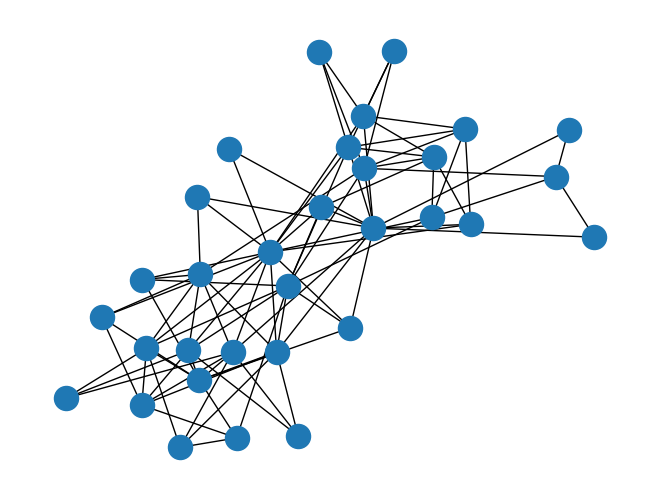

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

# load dataset using code provided by instructor
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

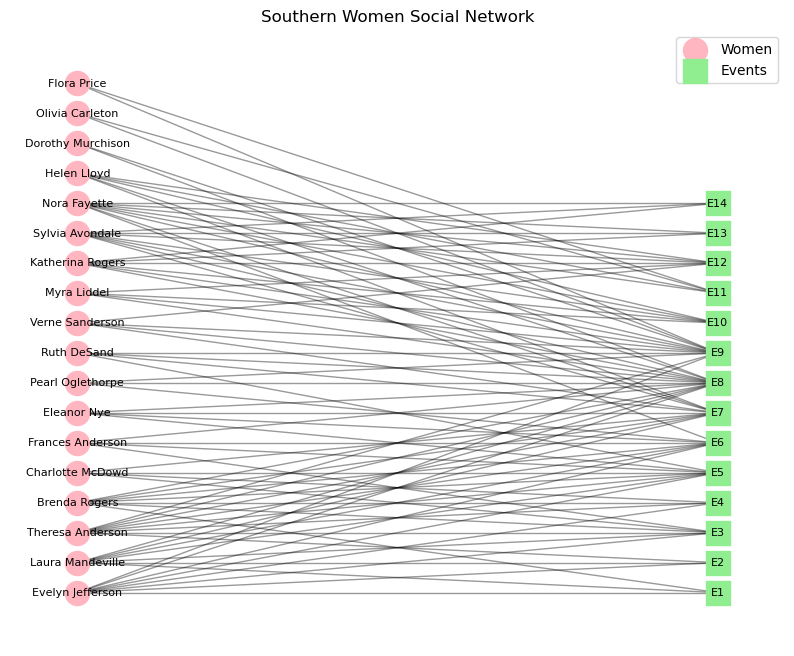

In [45]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite


G = nx.davis_southern_women_graph()
women = G.graph["top"]
events = G.graph["bottom"] 

#lets create a position map for the nodes, women on left, events on right
pos = {}
pos.update((n, (1, i)) for i, n in enumerate(women)) 
pos.update((n, (2, i)) for i, n in enumerate(events))

plt.figure(figsize=(10, 8))

# nodes in different color/shape for different sets
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='lightpink', node_shape='o', label="Women")
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='lightgreen', node_shape='s', label="Events")
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Southern Women Social Network")
plt.axis('off')
plt.legend()
plt.show() 


From the graph, you can tell that some women went to a lot more social events than others. The ones that really stand out are Theresa, Evelyn, Laura, Nora, and Sylvia, since they showed up at many of the gatherings. On the other hand, Flora, Olivia, and Dorothy didn’t go to as many events. It would be interesting to see how many people they still connected with even though they didn’t attend as much.

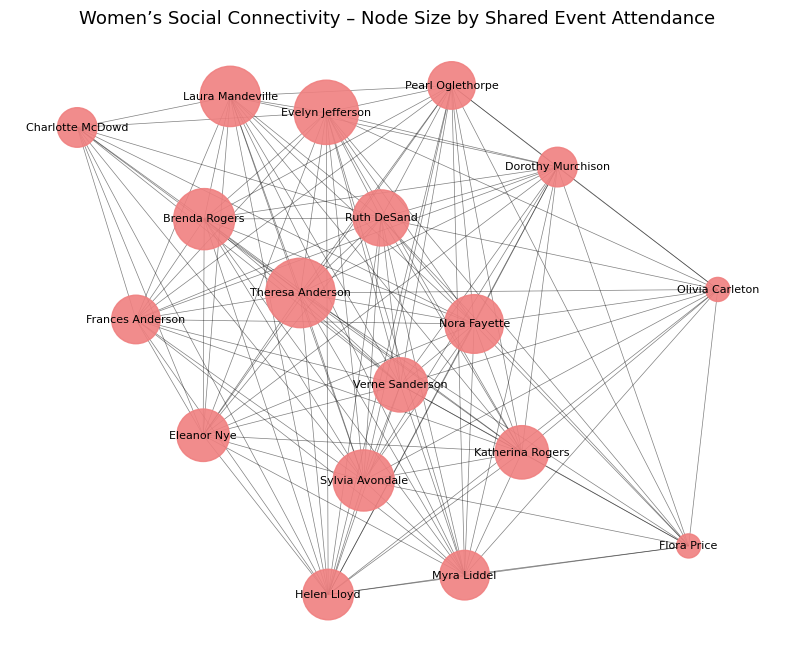

In [46]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

# Load the dataset
G = nx.davis_southern_women_graph()
women = G.graph["top"]
events = G.graph["bottom"]

# Weighted projection onto women
W = bipartite.weighted_projected_graph(G, women)

# Compute weighted degree (sum of shared event connections)
weighted_degree = dict(W.degree(weight='weight'))

# Normalize sizes to a reasonable range
min_size = 300
max_size = 2500
min_deg = min(weighted_degree.values())
max_deg = max(weighted_degree.values())

node_sizes = [
    ((weighted_degree[w] - min_deg) / (max_deg - min_deg)) * (max_size - min_size) + min_size
    for w in W.nodes()
]

# Visualize
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(W, seed=42)

nx.draw_networkx_nodes(
    W, pos,
    node_color='lightcoral',
    node_size=node_sizes,
    alpha=0.9
)
nx.draw_networkx_edges(W, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(W, pos, font_size=8, font_color='black')

plt.title("Women’s Social Connectivity – Node Size by Shared Event Attendance", fontsize=13)
plt.axis("off")
plt.show()





/var/folders/q3/l6f_bh316bq8shd_rgz2s_240000gn/T/ipykernel_96877/3204898155.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set3', len(communities))


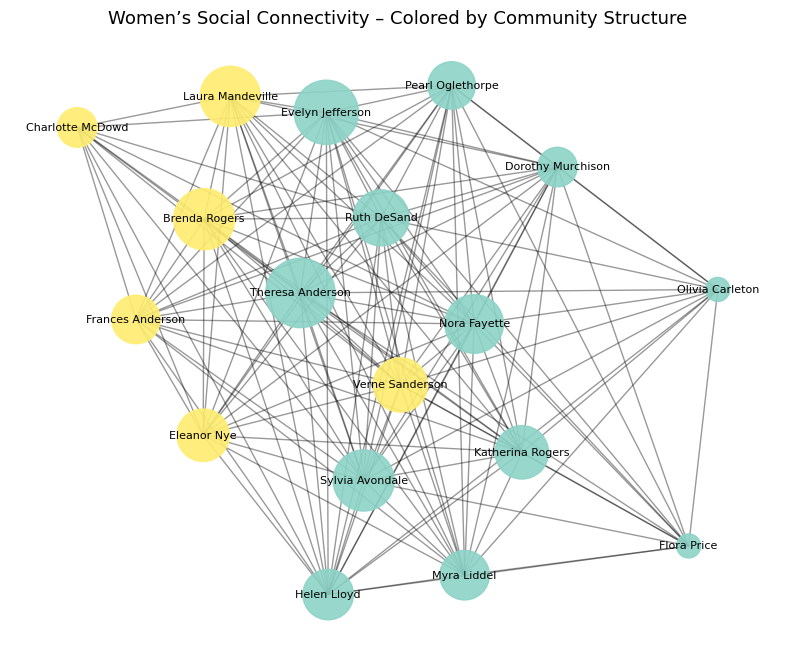

In [47]:
from networkx.algorithms import community
import matplotlib.cm as cm

# detect communities using greedy modularity
communities = community.greedy_modularity_communities(W)

# assign color to each community
community_map = {}
for i, c in enumerate(communities):
    for name in c:
        community_map[name] = i

# get color list
colors = [community_map[n] for n in W.nodes()]

# plot
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(W, seed=42)
cmap = cm.get_cmap('Set3', len(communities))

nx.draw_networkx_nodes(W, pos,
                       node_color=colors,
                       cmap=cmap,
                       node_size=node_sizes,
                       alpha=0.9)
nx.draw_networkx_edges(W, pos, alpha=0.4)
nx.draw_networkx_labels(W, pos, font_size=8, font_color="black")

plt.title("Women’s Social Connectivity – Colored by Community Structure", fontsize=13)
plt.axis("off")
plt.show()




### Node Size: Social Activity
Node sizes in the visualization represent the total number of shared events attended with other women (weighted degree). 

 Women such as **Evelyn Jefferson**, **Laura Mandeville**, **Theresa Anderson**, and **Brenda Rogers** appear as central figures, consistent with their high co-attendance levels across many events.

### Color: Community Structure
Colors indicate distinct **social subgroups** detected using a modularity-based community detection algorithm. The network divides roughly into **two primary communities**, which 
reflect the overlapping but semi-distinct social circles identified in the original 1941 study.  

One group (e.g., Laura Mandeville, Brenda Rogers, Frances Anderson, Eleanor Nye) attended a shared set of events, while the other (e.g., Evelyn Jefferson, Theresa Anderson, Sylvia Avondale, 
Nora Fayette) gravitated toward a different but intersecting series of gatherings.  This clustering suggests subtle divisions within the community, perhaps reflecting differences of some sort. Or maybe, women that attended more events, worked less and had more time to attend these events. 

In [48]:
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Load the original Davis Southern Women graph
G = nx.davis_southern_women_graph()
women = G.graph["top"]
events = G.graph["bottom"]

# Project onto events (so events are connected if they share attendees)
E = bipartite.weighted_projected_graph(G, events)

# Count how many women attended each event
event_attendance = {event: G.degree(event) for event in events}

# Create DataFrame
event_df = pd.DataFrame(list(event_attendance.items()), columns=['Event', '# of Women'])

# Sort by attendance
event_df = event_df.sort_values(by='# of Women', ascending=False).set_index('Event')

# Display with color gradient
display(event_df.style.background_gradient(cmap='Blues'))


,# of Women
Event,
E8,14
E9,12
E7,10
E5,8
E6,8
E3,6
E12,6
E10,5
E4,4


This table shows the number of women that attended each social event. Events with higher attendance are highlighted with a darker blue color, making it easy to see which gatherings were the most popular among women, while events with fewer attendees are shown in lighter shades. E8 had the highest attendance, indicating it was a particularly popular event. E9 and E7 also had high attendance, suggesting they were well-attended social gatherings. On the other hand, events like E1, E2, E13 and E14 had lower attendance, indicating they were less popular. 

I think that the events with higher attendance likely played a significant role in fostering social connections. In the network analysis, events with more attendees would create more opportunities for more connections among the women and potentially lead to higher overall connectivity in the social network.

In [49]:
# Weighted degree = total shared attendees between this event and others
event_overlap = dict(E.degree(weight='weight'))

# Create DataFrame
overlap_df = pd.DataFrame(list(event_overlap.items()), columns=['Event', 'Total Shared Attendees'])

# Sort from highest to lowest
overlap_df = overlap_df.sort_values(by='Total Shared Attendees', ascending=False).set_index('Event')

# Display nicely
display(overlap_df.style.background_gradient(cmap='Purples'))


,Total Shared Attendees
Event,
E8,59
E7,48
E9,46
E6,41
E5,38
E3,32
E12,28
E10,25
E4,23


Top 3 Most Attended Events: ['E8', 'E9', 'E7']


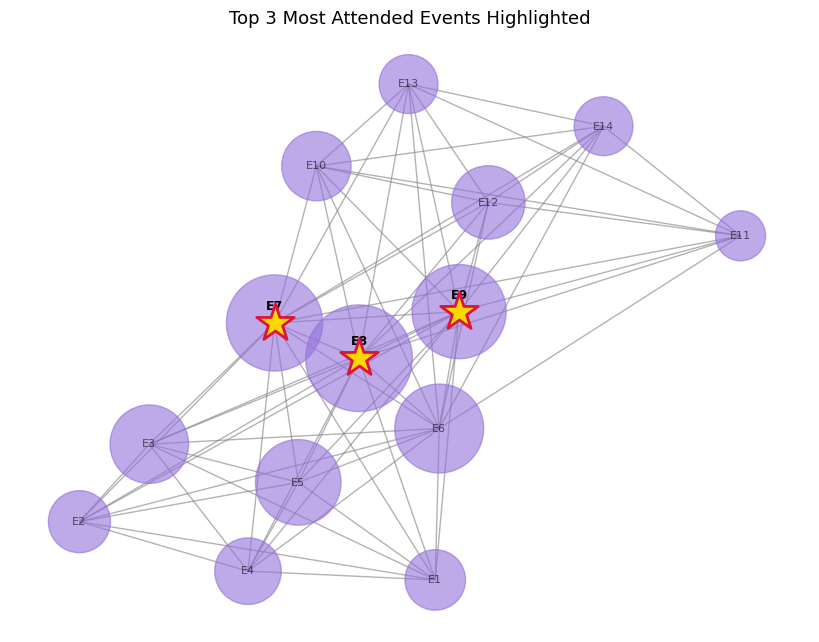

In [56]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite


# Find top 3 events by attendance
top3_events = event_df.head(3).index.tolist()
print("Top 3 Most Attended Events:", top3_events)

# Recalculate layout (important!)
pos = nx.spring_layout(E, seed=24)
sizes = [event_overlap[e]*100 for e in E.nodes()]

plt.figure(figsize=(8, 6))
nx.draw(E, pos,
        with_labels=True,
        node_color='mediumpurple',
        node_size=sizes,
        edge_color='gray',
        alpha=0.6,
        font_size=8)

# Add gold star highlights for top 3
for e in top3_events:
    x, y = pos[e]
    plt.scatter(x, y,
                s=800,
                color='gold',
                edgecolors='crimson',
                linewidths=2,
                marker='*',
                zorder=5)
    plt.text(x, y + 0.05, e, fontsize=9, ha='center', color='black', weight='bold')

plt.title("Top 3 Most Attended Events Highlighted", fontsize=13)
plt.axis("off")
plt.show()


The graph above highlights the three most attended events: E7, E8, and E9. These events are shown with gold stars because they had the highest turnout and the most overlap in attendance. This means that many of the same women went to these gatherings, making them the main social hubs of the network.

,Weighted Degree,Betweenness
Flora Price,14,0.136285
Olivia Carleton,14,0.136285
Dorothy Murchison,24,0.095770
Helen Lloyd,34,0.061689
Frances Anderson,32,0.057861


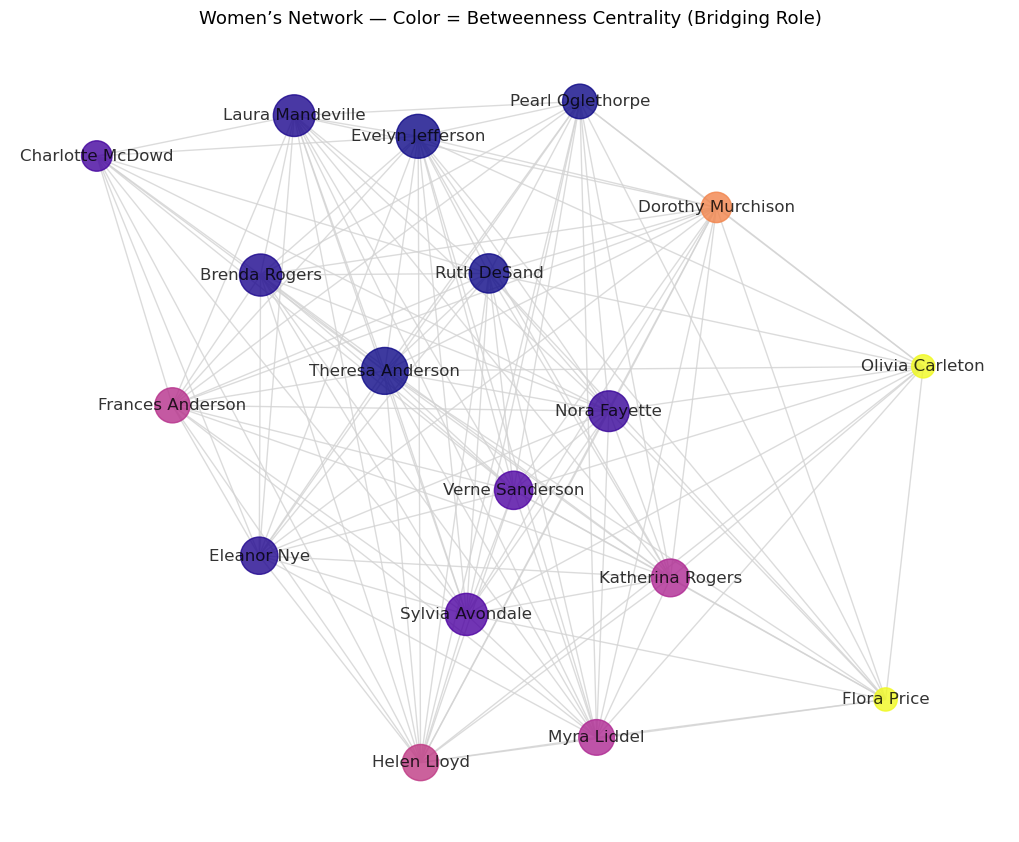

In [57]:
# Rebuild the weighted-degree dictionary for the women network
from networkx.algorithms import bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
W = bipartite.weighted_projected_graph(G, women)

wd = dict(W.degree(weight='weight'))


# compute betweenness centrality for the women network
betweenness = nx.betweenness_centrality(W, weight='weight')

# make a DataFrame to combine with weighted degree
centrality_df = pd.DataFrame({
    'Weighted Degree': pd.Series(wd),
    'Betweenness': pd.Series(betweenness)
})

centrality_df = centrality_df.sort_values('Betweenness', ascending=False)
display(centrality_df.head(5).style.background_gradient(cmap='Oranges'))

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(W, seed=42)

# color nodes by betweenness
colors = [betweenness[n] for n in W.nodes()]
sizes = [wd[n]*20 for n in W.nodes()]

nx.draw(W, pos,
        node_color=colors,
        node_size=sizes,
        cmap='plasma',
        with_labels=True,
        edge_color='lightgray',
        alpha=0.8)
plt.title("Women’s Network — Color = Betweenness Centrality (Bridging Role)", fontsize=13)
plt.axis("off")
plt.show()


When looking at betweenness centrality, the results were surprising. The women with the highest scores were Flora Price and Olivia Carleton, even though they attended fewer events overall. This means that while they weren’t the most active socially, they played an important role in connecting different parts of the network.

In other words, Flora and Olivia acted as bridges between two main groups of women. Without them, the community would have been more divided, and communication between the groups would have been weaker. This shows that being socially influential isn’t always about how many events someone attends, but about where they sit in the network and how they connect others.